# Question 2

In [2]:
# Import libraries

import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt

### Part a)

In [2]:
# We define a function Vardermonde which gives us our matrix 

def Vandermonde(x,d):
    n = np.size(x)
    d = n - 1
    V = np.zeros((n,d+1))
    for i in range(d+1):
        V[:,i] = x**i
    return V

In [3]:
# We commpute the Condition number two ways, one directly, the other by multiplying the two norms of the matrix and its transpose
# The norm I chose was the Frobenius Norm

def Condition1(V):
    FN_1 = np.linalg.norm(V, 'fro')
    FN_2 = np.linalg.norm(np.linalg.inv(V), 'fro')
    K = FN_1*FN_2
    return K

def Condition2(V):
    K = np.linalg.cond(V, 'fro')
    return K

In [4]:
# We define a function which creates equidistant points in [-1,1]

def f(n):
    x = np.linspace(-1,1,n)
    return x

In [5]:
# Combining everything together, I get a function which can be set to return x or y

def Condition_Vandermonde(n):
    x = Condition1(Vandermonde(f(n),0))
    y = Condition1(Vandermonde(f(n),0))
    return x 

In [6]:
# The condition number of a few Vandermonde Matrices

print(Condition_Vandermonde(1),Condition_Vandermonde(2),Condition_Vandermonde(4),
      Condition_Vandermonde(7),Condition_Vandermonde(10),Condition_Vandermonde(20),Condition_Vandermonde(100))

print('The condition number clearly increases very rapidly as we increase the size of the Vandermonde matrix')

1.0 2.0 11.952179522416689 269.347759873128 6830.665068194263 414609588.27312267 1.8982738115902116e+19
The condition number clearly increases very rapidly as we increase the size of the Vandermonde matrix


### Part b)

In [11]:
# We define a function LSP which takes a vector x to generate a Vandermomde matrix and an output value b
# and it returns an array of coefficients which minimise the square error.

def LSP(x,b):
    V = np.zeros((5,4))
    for i in range(4):
        V[:,i] = x**i
        
# Matrix Transpose

    VT = np.matrix.transpose(V)

# In order to minimise the square distance, we solve x = (VT*V)^(-1)*VT*b

    Sol = np.dot(np.matmul(np.linalg.inv(np.matmul(VT,V)),VT),b)
    return Sol
LSP(np.array([1,2,3,4,5]),np.array([1,2,3,4,5]))

array([-3.34310357e-12,  1.00000000e+00, -8.08242362e-14,  8.10462808e-15])

### Part c)

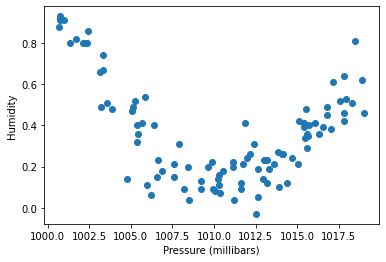

In [8]:
# Get the data from Excel

var = pd.read_csv(r'C:\Users\Giovanni Laura\OneDrive\Documents\Giovanni\Warwick\Third Year\MA398 Matrix Analysis & Algorithms\Assignments\Assignment 2\WeatherData.csv')

# Plot the data and add labels to the axis

plt.scatter(var['Pressure (millibars)'], var['Humidity'])
plt.ylabel('Humidity')
plt.xlabel('Pressure (millibars)')

# Convert to numpy

data = var.to_numpy()

# Define a function which takes an input matrix generated by a vector x and integer d, and a target vector b

def LSP(x,b,d):
    n = np.size(x)
    V = np.zeros((n,d))
    for i in range(d):
        V[:,i] = x**i
        
# Matrix Transpose

    VT = np.matrix.transpose(V)
    
# In order to minimise the square distance, we solve x = (VT*V)^(-1)*VT*b      

    Sol = np.dot(np.matmul(np.linalg.inv(np.matmul(VT,V)),VT),b)
    return Sol

In [13]:
# Get the coefficients for the LSP for d = 0,1,2,3,4,5

def f(x):
    y = LSP(data[:90,0], data[:90,1], x)
    return y
print('When d = 0, the coefficients for the LSP are', f(0))
print('When d = 1, the coefficients for the LSP are', f(1))
print('When d = 2, the coefficients for the LSP are', f(2))
print('When d = 3, the coefficients for the LSP are', f(3))
print('When d = 4, the coefficients for the LSP are', f(4))
print('When d = 5, the coefficients for the LSP are', f(5))

When d = 0, the coefficients for the LSP are []
When d = 1, the coefficients for the LSP are [0.35466667]
When d = 2, the coefficients for the LSP are [ 1.77927556e+01 -1.72620923e-02]
When d = 3, the coefficients for the LSP are [ 8.10999667e+03 -1.60465830e+01  7.93764970e-03]
When d = 4, the coefficients for the LSP are [ 1.05701181e+05 -3.05998258e+02  2.95089958e-01 -9.47917774e-05]
When d = 5, the coefficients for the LSP are [ 6.19962916e+04 -9.14447483e+01 -8.51635337e-02  1.96883470e-04
 -8.22704168e-08]


Text(0.5, 0, 'Polynomial order')

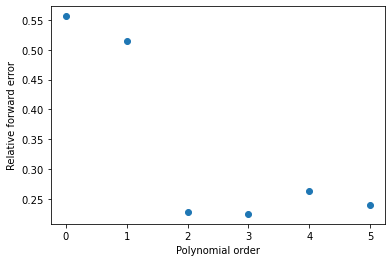

In [10]:
# Relative forward error of polynomial models

def RFE(d):
    V = np.zeros((90,d+1))
    for i in range(d+1):
        V[:,i] = data[:90,0]**i
    a = np.dot(V, f(d+1))
    b = np.linalg.norm(a - data[:90,1] ,2)
    c = b/np.linalg.norm(data[:90,1],2)
    return c

plt.scatter([0,1,2,3,4,5],[RFE(0),RFE(1),RFE(2),RFE(3),RFE(4),RFE(5)])
plt.ylabel('Relative forward error')
plt.xlabel('Polynomial order')

Text(0.5, 0, 'Polynomial order')

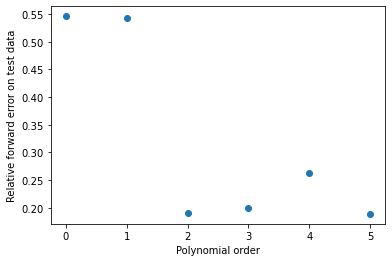

In [11]:
# Relative forward error on test data

def RFE(d):
    V = np.zeros((10,d+1))
    for i in range(d+1):
        V[:,i] = data[90:,0]**i
    a = np.dot(V, f(d+1))
    b = np.linalg.norm(a - data[90:,1] ,2)
    c = b/np.linalg.norm(data[90:,1])
    return c

plt.scatter([0,1,2,3,4,5],[RFE(0),RFE(1),RFE(2),RFE(3),RFE(4),RFE(5)])
plt.ylabel('Relative forward error on test data')
plt.xlabel('Polynomial order')

The order of the polynomial which gives the best result is order 2, as it has the joint smallest relative forward error
for both the original data as well as the test data, with the other one being order 3. 2 is better firstly for simplicity,
and second of all from the plot above we can see the shape of an order 2 polynomial but don't know if it has a local maxima
outside of our input range which would imply at least an order 3, so it's better to pick order 2.

In [12]:
# Lets calculate the estimates for the humidity of the last five days

V = np.zeros((5,3))
for i in range(3):
    V[:,i] = data[95:,0]**i
a = np.dot(V, f(3))

print('For day 96, the best estimate was', a[0] , 'whereas the observed value was 0.16')
print('For day 97, the best estimate was', a[1] , 'whereas the observed value was 0.81')
print('For day 98, the best estimate was', a[2] , 'whereas the observed value was 0.12')
print('For day 99, the best estimate was', a[3] , 'whereas the observed value was 0.34')
print('For day 100, the best estimate was', a[4] , 'whereas the observed value was 0.20')

For day 96, the best estimate was 0.14124229118624498 whereas the observed value was 0.16
For day 97, the best estimate was 0.6100486910472682 whereas the observed value was 0.81
For day 98, the best estimate was 0.14481904928561562 whereas the observed value was 0.12
For day 99, the best estimate was 0.31324620885698096 whereas the observed value was 0.34
For day 100, the best estimate was 0.18277975718046946 whereas the observed value was 0.20
